# Exploring Database

In this notebook, we'll get acquainted with our Curriculum Lattes database by answering some initial questions about it. 

-----

**First of all, let's import a few things...**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Importing dataframe...**

In [2]:
df = pd.read_csv('views/Autor_Artigo_Dataframe.csv', sep=';', encoding='latin-1', index_col=0)

In [4]:
# dataset of all curricula in Lattes platform (we only got access to some of them)
#area = pd.read_csv('views/lista_cv_areas.csv', sep=',', encoding='utf-8', index_col=0)

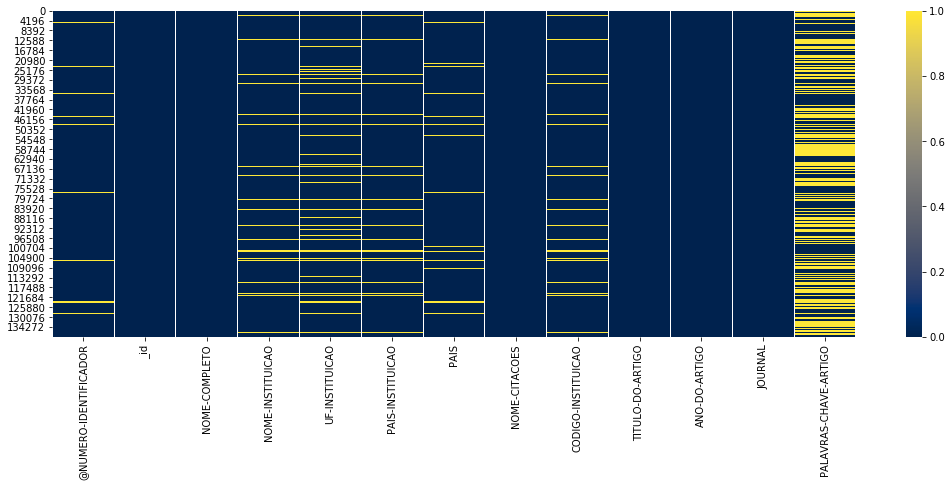

In [5]:
plt.figure(figsize=(18,6))
sns.heatmap(df.isna(), cmap='cividis')

<br>

<font color='red'>**Checar com o Davi:** os números abaixo não batem </font>

In [6]:
area[area['NOME_AREA_CONHEC'] == 'Matemática'].shape[0]

NameError: name 'area' is not defined

In [ ]:
area[area['NOME_AREA_CONHEC'] == 'Probabilidade e Estatística'].shape[0]

In [ ]:
area[area['NOME_AREA_CONHEC'] == 'Ciência da Computação'].shape[0]

In [ ]:
5160 + 1421 + 6288

In [ ]:
df['@NUMERO-IDENTIFICADOR'].unique().shape[0]

In [ ]:
#sorted(list(area['NOME_AREA_CONHEC'].value_counts().index))

<br>

Now that we already have our dataset ready, let's begin exploring some preliminaries information about the profile of mathematical research in Brazil.

We'll begin answering some simple questions, like..

----


**How many brazilian researchers are there in the mathematical field?**

In [7]:
print('# of researchers in "great" mathematics field: ', df['@NUMERO-IDENTIFICADOR'].unique().shape[0])

# of researchers in "great" mathematics field:  9691


**How many published papers we have in our database?**

In [8]:
print('# of publications:', df['TITULO-DO-ARTIGO'].unique().shape[0])

# of publications: 116746


In [9]:
# texto na coluna de ano?
df['ANO-DO-ARTIGO'].value_counts().index

Index(['2016', '2017', '2018', '2015', '2013', '2014', '2012', '2011', '2010',
       '2009', '2008', '2007', '2005', '2006', '2004', '2019', '2003', '2002',
       '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993',
       '1992', '1990', '1991', '1989', '1988', '1987', '1986', '1985', '1984',
       '1983', '1982', '1981', '1979', '1980', '1978', '1977', '1900', '1976',
       '1974', '1973', '1975', '1972', '1971', '1970', '1968', '1969', 'rint',
       '1967', '1966', '1965', 'onic', '1964', '1963', '1959', '1961', '1962',
       '1950', '1948', '1957', '1960', '1951', '1949', '1955', '1946', '1956'],
      dtype='object')

In [10]:
df.groupby('ANO-DO-ARTIGO').count()['_id'].loc['onic']

11

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138466 entries, 0 to 138465
Data columns (total 13 columns):
@NUMERO-IDENTIFICADOR    135028 non-null float64
_id                      138466 non-null object
NOME-COMPLETO            138466 non-null object
NOME-INSTITUICAO         129734 non-null object
UF-INSTITUICAO           121080 non-null object
PAIS-INSTITUICAO         130030 non-null object
PAIS                     131745 non-null object
NOME-CITACOES            138466 non-null object
CODIGO-INSTITUICAO       129737 non-null object
TITULO-DO-ARTIGO         138465 non-null object
ANO-DO-ARTIGO            138465 non-null object
JOURNAL                  138101 non-null object
PALAVRAS-CHAVE-ARTIGO    68947 non-null object
dtypes: float64(1), object(12)
memory usage: 14.8+ MB


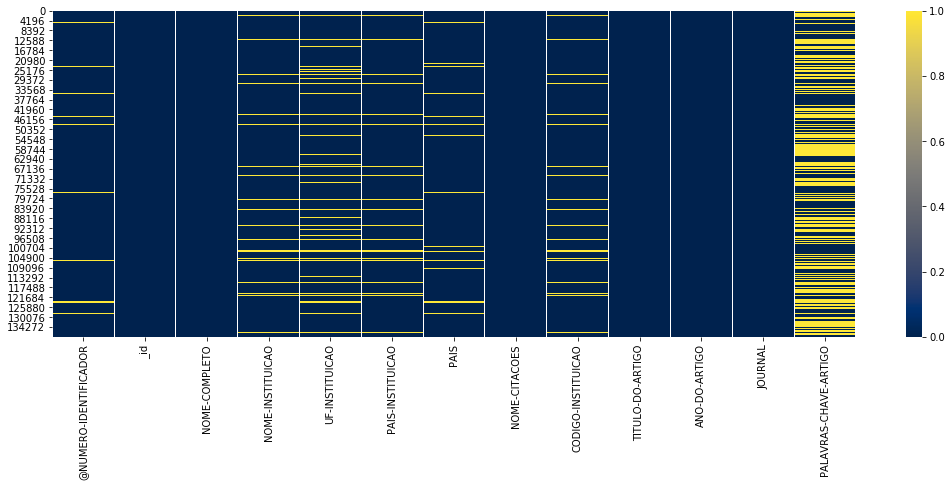

In [12]:
plt.figure(figsize=(18,6))
sns.heatmap(df.isna(), cmap='cividis')

## Choropleth Map of Publications

In [13]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 

In [14]:
temp = pd.DataFrame(df['PAIS'].value_counts())
temp.reset_index(inplace=True)

In [15]:
temp = pd.melt(temp, id_vars='index', value_vars='PAIS')
temp.head()

,index,variable,value
0,Brasil,PAIS,116920
1,Peru,PAIS,1495
2,Argentina,PAIS,1303
3,Itália,PAIS,1145
4,Rússia,PAIS,977


In [16]:
temp.head()

,index,variable,value
0,Brasil,PAIS,116920
1,Peru,PAIS,1495
2,Argentina,PAIS,1303
3,Itália,PAIS,1145
4,Rússia,PAIS,977


<font color='red'>Para ficar 100%, falta passar o nome dos países para inglês </font>

In [18]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale = True,
        locations = temp['index'],
        locationmode = "country names",
        text = '',
        z = temp['value'],
        colorbar = {'title' : '# of Researchers'},
      ) 

layout = dict(title = 'Number of researchers in database from each country',
                geo = dict(showframe = False,projection = {'type':'equirectangular'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [140]:
choromap.write_image('test.png')

OBS: salvar em figura não fica tão bom... 

Mas dá para salvar em html com o comando: figure.write_html()